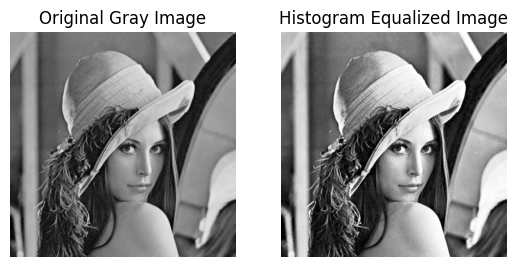

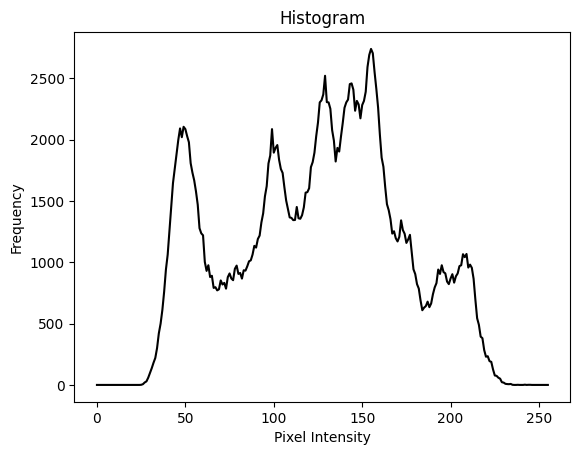

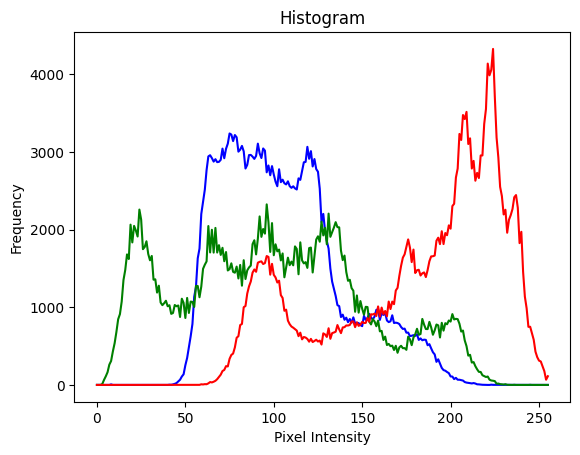

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

enhanced_image = histogram_equalization(gray_image)
display_images(gray_image, enhanced_image, "Original Gray Image", "Histogram Equalized Image")

def compute_histogram(image, color=False):
    if color:
        colors = ('b', 'g', 'r')
        for i, col in enumerate(colors):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            plt.plot(hist, color=col)
    else:
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        plt.plot(hist, color='black')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title('Histogram')
    plt.show()

def histogram_equalization(image):
    equalized = cv2.equalizeHist(image)
    return equalized

def display_images(original, processed, title1, title2):
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title(title1)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(processed, cmap='gray')
    plt.title(title2)
    plt.axis('off')
    plt.show()

def fourier_transform(image):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift))
    return dft_shift, magnitude_spectrum

def inverse_fourier_transform(dft_shift):
    idft_shift = np.fft.ifftshift(dft_shift)
    reconstructed_image = np.fft.ifft2(idft_shift)
    return np.abs(reconstructed_image)

def verify_rotation_property(image, angle):
    rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE if angle == 90 else cv2.ROTATE_180)
    _, mag_spectrum_original = fourier_transform(image)
    _, mag_spectrum_rotated = fourier_transform(rotated_image)

    plt.subplot(1, 2, 1)
    plt.imshow(mag_spectrum_original, cmap='gray')
    plt.title("Original Spectrum")

    plt.subplot(1, 2, 2)
    plt.imshow(mag_spectrum_rotated, cmap='gray')
    plt.title("Rotated Spectrum")
    plt.show()

color_image = cv2.imread('Lena_Image.png')
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

compute_histogram(gray_image)
compute_histogram(color_image, color=True)



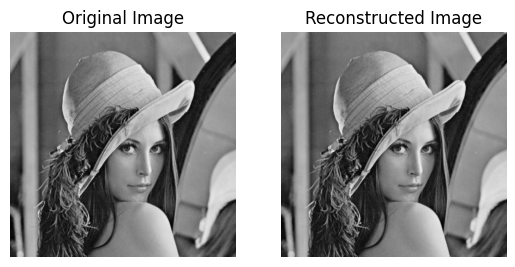

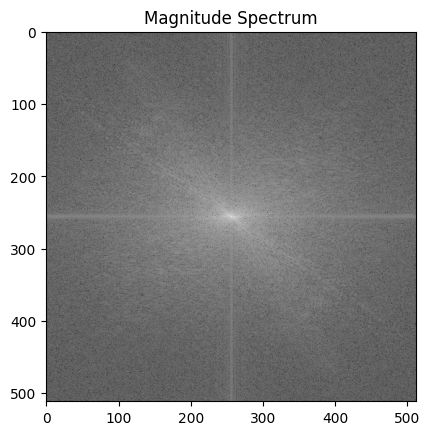

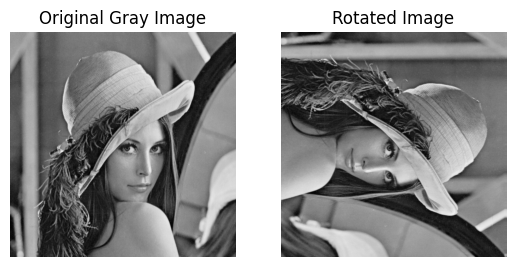

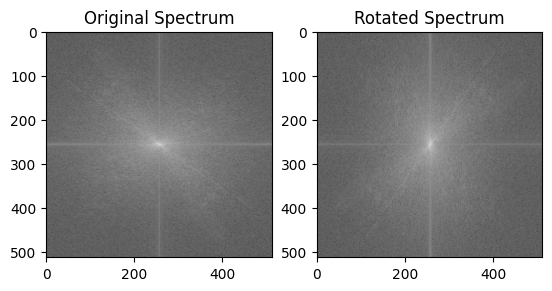

In [10]:
display_images(gray_image, reconstructed_image, "Original Image", "Reconstructed Image")
reconstructed_image = inverse_fourier_transform(dft_shift)
dft_shift, magnitude_spectrum = fourier_transform(gray_image)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.show()

display_images(gray_image, rotated_gray_image, "Original Gray Image", "Rotated Image")
rotated_gray_image = cv2.rotate(gray_image, cv2.ROTATE_90_CLOCKWISE)

verify_rotation_property(gray_image, 90)



